In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


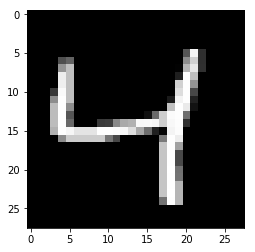

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

# input2 =tf.placeholder(tf.float32, (28, 28, 1), name='inputs2')
# target2 = tf.placeholder(tf.float32, (28, 28, 1), name='target2')
### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [5]:
sess = tf.Session()

In [ ]:
epochs = 1
batch_size = 200
sess = tf.Session()
write_to_csv =[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for ii in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)
            imgs = batch[0].reshape((-1, 28, 28, 1))
            batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})
        
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost))
    x_train=mnist.train.images.reshape((-1, 28, 28, 1))
    print("train over")
    
    
    for ii in range(mnist.train.num_examples):
            
        batch_2= mnist.train.next_batch(1)
        imgs_2 = batch[0].reshape((-1, 28, 28, 1))
    
        write_to_csv.append(encoded.eval(feed_dict={inputs_: imgs_2, targets_: imgs_2}))#keep_prob:1.0
        
    print("fill over")

Epoch: 1/1... Training loss: 0.6916
Epoch: 1/1... Training loss: 0.6867
Epoch: 1/1... Training loss: 0.6813
Epoch: 1/1... Training loss: 0.6749
Epoch: 1/1... Training loss: 0.6681
Epoch: 1/1... Training loss: 0.6590
Epoch: 1/1... Training loss: 0.6487
Epoch: 1/1... Training loss: 0.6380
Epoch: 1/1... Training loss: 0.6240
Epoch: 1/1... Training loss: 0.6063
Epoch: 1/1... Training loss: 0.5870
Epoch: 1/1... Training loss: 0.5690
Epoch: 1/1... Training loss: 0.5483
Epoch: 1/1... Training loss: 0.5336
Epoch: 1/1... Training loss: 0.5169
Epoch: 1/1... Training loss: 0.5142
Epoch: 1/1... Training loss: 0.5103
Epoch: 1/1... Training loss: 0.5076
Epoch: 1/1... Training loss: 0.5068
Epoch: 1/1... Training loss: 0.5065
Epoch: 1/1... Training loss: 0.5086
Epoch: 1/1... Training loss: 0.4789
Epoch: 1/1... Training loss: 0.4778
Epoch: 1/1... Training loss: 0.4690
Epoch: 1/1... Training loss: 0.4683
Epoch: 1/1... Training loss: 0.4470
Epoch: 1/1... Training loss: 0.4503
Epoch: 1/1... Training loss:

Epoch: 1/1... Training loss: 0.1635
Epoch: 1/1... Training loss: 0.1570
Epoch: 1/1... Training loss: 0.1590
Epoch: 1/1... Training loss: 0.1599
Epoch: 1/1... Training loss: 0.1630
Epoch: 1/1... Training loss: 0.1591
Epoch: 1/1... Training loss: 0.1593
Epoch: 1/1... Training loss: 0.1565
Epoch: 1/1... Training loss: 0.1573
Epoch: 1/1... Training loss: 0.1611
Epoch: 1/1... Training loss: 0.1542
Epoch: 1/1... Training loss: 0.1563
Epoch: 1/1... Training loss: 0.1618
Epoch: 1/1... Training loss: 0.1607
Epoch: 1/1... Training loss: 0.1550
Epoch: 1/1... Training loss: 0.1589
Epoch: 1/1... Training loss: 0.1630
Epoch: 1/1... Training loss: 0.1633
Epoch: 1/1... Training loss: 0.1574
Epoch: 1/1... Training loss: 0.1597
Epoch: 1/1... Training loss: 0.1595
Epoch: 1/1... Training loss: 0.1567
Epoch: 1/1... Training loss: 0.1598
Epoch: 1/1... Training loss: 0.1543
Epoch: 1/1... Training loss: 0.1520
Epoch: 1/1... Training loss: 0.1532
Epoch: 1/1... Training loss: 0.1536
Epoch: 1/1... Training loss:

In [ ]:
len(write_to_csv)

In [21]:
data = pd.DataFrame(write_to_csv)
data.to_csv('train/feature_out.csv')

ValueError: Must pass 2-d input

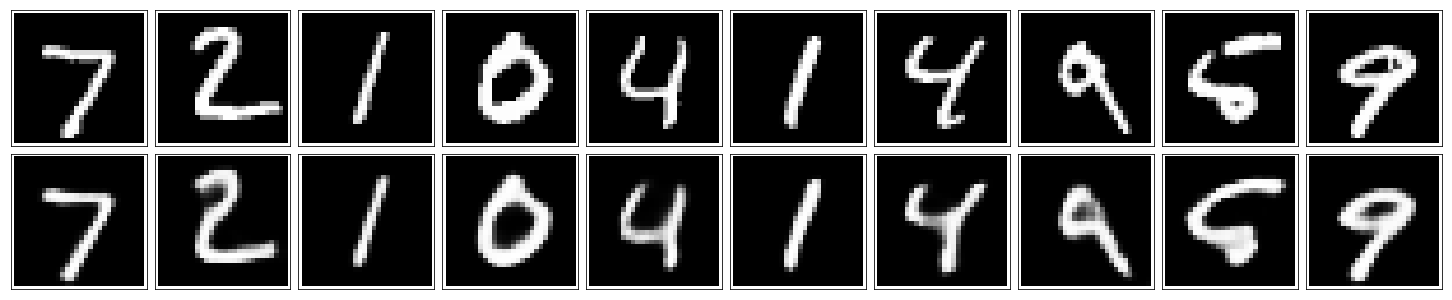

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)